# Import and Setup

In [13]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)
random.seed(42)

# Generate Synthetic User Features

In [2]:
n_users = 1000
user_ids = np.arange(n_users)

# Simulate realistic demographic and health-related features
ages = np.random.randint(18, 70, n_users)
genders = np.random.choice(['male', 'female'], size=n_users)
bmi = np.round(np.random.normal(27, 4, size=n_users), 1)  # Avg BMI ~27 with spread
activity_levels = np.random.choice(['low', 'moderate', 'high'], size=n_users, p=[0.3, 0.5, 0.2])
has_diabetes = np.random.choice([0, 1], size=n_users, p=[0.85, 0.15])         # ~15% prevalence
is_hypertensive = np.random.choice([0, 1], size=n_users, p=[0.75, 0.25])     # ~25% prevalence
is_vegetarian = np.random.choice([0, 1], size=n_users, p=[0.7, 0.3])
cholesterol = np.round(np.random.normal(190, 30, size=n_users))  # Avg ~190 mg/dL
medications = np.random.choice(['none', 'statin', 'insulin'], size=n_users, p=[0.6, 0.25, 0.15])

# Combine into a DataFrame
users = pd.DataFrame({
    'user_id': user_ids,
    'age': ages,
    'gender': genders,
    'bmi': bmi,
    'activity_level': activity_levels,
    'has_diabetes': has_diabetes,
    'is_hypertensive': is_hypertensive,
    'is_vegetarian': is_vegetarian,
    'cholesterol': cholesterol,
    'medications': medications
})

In [3]:
users

,user_id,age,gender,bmi,activity_level,has_diabetes,is_hypertensive,is_vegetarian,cholesterol,medications
0,0,56,male,26.9,moderate,1,0,1,200.0,insulin
1,1,69,male,31.8,moderate,0,0,0,182.0,none
2,2,46,male,37.1,moderate,0,1,0,154.0,statin
3,3,32,female,24.9,moderate,0,0,1,156.0,none
4,4,60,male,25.0,moderate,1,1,1,211.0,insulin
...,...,...,...,...,...,...,...,...,...,...
995,995,60,female,30.1,high,0,0,0,236.0,none
996,996,64,male,32.2,low,0,0,0,150.0,none
997,997,62,female,32.6,moderate,0,1,1,164.0,none
998,998,35,male,24.8,low,0,0,0,231.0,statin


# Define Meal Plans (Treatments)

In [4]:
meal_plans = pd.DataFrame({
    'meal_id': [0, 1, 2],
    'meal_type': ['standard', 'low_sodium', 'mediterranean']
})


# Assign Meals (biased based on health conditions)

In [5]:
def assign_meal(row):
    if row['is_hypertensive']:
        return np.random.choice([1, 2], p=[0.6, 0.4])
    elif row['has_diabetes']:
        return np.random.choice([0, 2], p=[0.4, 0.6])
    elif row['is_vegetarian']:
        return 2
    else:
        return np.random.choice([0, 1, 2], p=[0.5, 0.3, 0.2])

users['meal_id'] = users.apply(assign_meal, axis=1)


# Simulate Health Outcome (health_score: 0 to 1)

In [6]:
def simulate_health_score(row):
    base = 0.5

    # Treatment effect based on condition match
    if row['meal_id'] == 1:  # Low sodium
        base += 0.12 if row['is_hypertensive'] else -0.03
    elif row['meal_id'] == 2:  # Mediterranean
        base += 0.10 if row['has_diabetes'] else 0.02
        if row['is_vegetarian']:
            base += 0.02

    # BMI penalty
    base -= 0.01 * max(0, row['bmi'] - 25)

    # Activity level
    if row['activity_level'] == 'high':
        base += 0.05
    elif row['activity_level'] == 'low':
        base -= 0.03

    # Medication benefits
    if row['medications'] == 'statin':
        base += 0.02
    elif row['medications'] == 'insulin':
        base += 0.04

    # Add noise for realism
    return round(np.clip(np.random.normal(base, 0.05), 0, 1), 3)

users['health_score'] = users.apply(simulate_health_score, axis=1)

# Save to CSV

In [7]:
users.to_csv('../data/synthetic_users.csv', index=False)
meal_plans.to_csv('../data/meal_plans.csv', index=False)

# Preview

In [8]:
users.describe(include='all')

,user_id,age,gender,bmi,activity_level,has_diabetes,is_hypertensive,is_vegetarian,cholesterol,medications,meal_id,health_score
count,1000.000000,1000.00000,1000,1000.000000,1000,1000.000000,1000.000000,1000.00000,1000.000000,1000,1000.000000,1000.000000
unique,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,male,NaN,moderate,NaN,NaN,NaN,NaN,none,NaN,NaN
freq,NaN,NaN,524,NaN,498,NaN,NaN,NaN,NaN,627,NaN,NaN
mean,499.500000,43.81900,NaN,27.322100,NaN,0.130000,0.251000,0.29400,188.525000,NaN,1.170000,0.513506
std,288.819436,14.99103,NaN,3.974982,NaN,0.336472,0.433805,0.45582,30.135154,NaN,0.820837,0.084842
min,0.000000,18.00000,NaN,15.300000,NaN,0.000000,0.000000,0.00000,103.000000,NaN,0.000000,0.280000
25%,249.750000,31.00000,NaN,24.600000,NaN,0.000000,0.000000,0.00000,169.000000,NaN,0.000000,0.455000
50%,499.500000,44.00000,NaN,27.300000,NaN,0.000000,0.000000,0.00000,189.000000,NaN,1.000000,0.509000
75%,749.250000,56.00000,NaN,30.000000,NaN,0.000000,1.000000,1.00000,208.000000,NaN,2.000000,0.570000


In [9]:
# Check meal type distribution
print(users['meal_id'].value_counts(normalize=True))
print(users['meal_id'].map(dict(zip(meal_plans['meal_id'], meal_plans['meal_type']))).value_counts())


meal_id
2    0.436
1    0.298
0    0.266
Name: proportion, dtype: float64
meal_id
mediterranean    436
low_sodium       298
standard         266
Name: count, dtype: int64


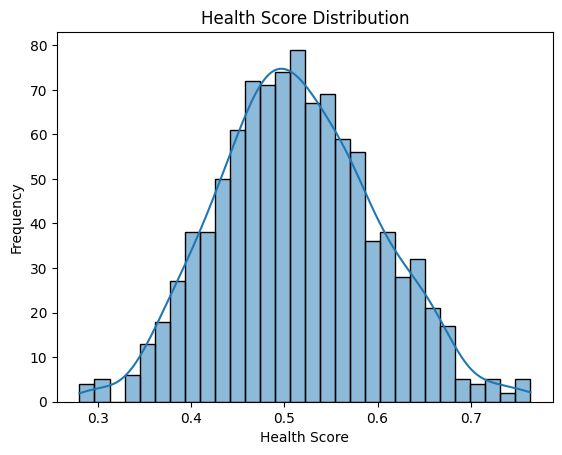

In [14]:
# Check health score distribution
sns.histplot(users['health_score'], bins=30, kde=True)
plt.title("Health Score Distribution")
plt.xlabel("Health Score")
plt.ylabel("Frequency")
plt.show()

In [15]:
# Crosstab by condition
print(pd.crosstab(users['has_diabetes'], users['meal_id'], normalize='index'))
print(pd.crosstab(users['is_hypertensive'], users['meal_id'], normalize='index'))

meal_id              0         1         2
has_diabetes                              
0             0.255172  0.326437  0.418391
1             0.338462  0.107692  0.553846
meal_id                0         1         2
is_hypertensive                             
0                0.35514  0.186916  0.457944
1                0.00000  0.629482  0.370518
